In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.patches import Arc

In [2]:
import json
import pandas as pd
loc = "C:/Users/Harry/Data Science Sports/data/"

In [3]:
#ID for England vs Sweden Womens World Cup
match_id_required = 69301

file_name = str(match_id_required)+'.json'

#Load in match events for ID 69301
with open(loc + "StatsBomb/data/" + "events/" + file_name ) as f:
    events = json.load(f)
    
# store the dataframe in a dictionary with the match id as key (remove '.json' from string)
# Assign function creates a new column with value in DataFrame
df = pd.json_normalize(events, sep = "_").assign(match_id = file_name[:-5])

#Answer 1.Pass Selection Only
passes = df[df["type_name"] == "Pass"].set_index("id")
passes.sort_values("team_name", inplace = True)

In [4]:
team_size = passes["team_name"].unique()

In [5]:
""" This function is used to draw pitch """

def draw_pitch(x_min=0, x_max=120,
               y_min=0, y_max=80,
               pitch_color="w",
               line_color="grey",
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")

    
    ax.axis("off")

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # pitch x markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # pitch y markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer boxed
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard boxes
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfway line, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

In [6]:
# Function to identify axes for text
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="black")

    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

In [9]:
#Size of the pitch in yards (StatsBomb)
pitchLengthX = 120
pitchWidthY = 80

main = np.arange(team_size.size).reshape(-1, 2)

# Layout format
# Eg. Title 1 row across 3 column length, Main, annot 1 row across 3 column length
layout = np.concatenate([ 
            np.tile(['title'], (1, main.shape[1])),
            main,
            np.tile(['annot'], (1, main.shape[1]))
        ])


height_ratios = np.repeat(1, main.shape[0]).tolist()
height_ratios.insert(0, 0.05)
height_ratios.append(0.05)

{'0': <AxesSubplot:label='0'>, '1': <AxesSubplot:label='1'>}
AxesSubplot(0.125,0.199693;0.352273x0.605615)
AxesSubplot(0.547727,0.199693;0.352273x0.605615)


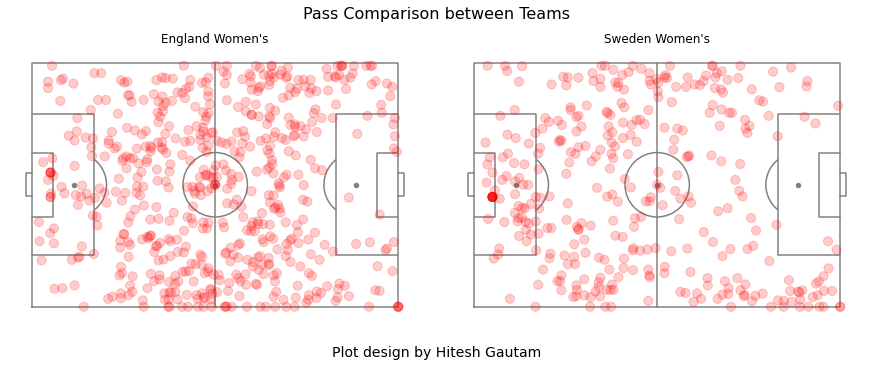

In [12]:
# Adding subplot 
fig, axd = plt.subplot_mosaic(layout,constrained_layout=True,figsize=(12, 5*main.shape[0]), 
                              gridspec_kw={'height_ratios':height_ratios})

# Filter title and annot from axd.values
main_dict = {k: v for k, v in axd.items() if (k != 'title' and k !='annot')}

# For every ax we call function draw_pitch with horizontal orientation 

print(main_dict)

team_change = passes.iloc[0]["team_name"]
row_iterator = passes.iterrows()
for ax in main_dict.values():
    print(ax)
    #Pitch Outline & Centre Line
    draw_pitch(orientation="h",aspect="full",ax=ax)
    
    ax.set_title(team_change)
    for i, Pass in row_iterator:
        if(team_change == Pass['team_name']):
            
            # Starting Points
            x=Pass['location'][0]
            y=Pass['location'][1]

            circleSize= 1.5

            passCircle = plt.Circle( (x, pitchWidthY - y),circleSize, color = "red")
            passCircle.set_alpha(.2)
            ax.add_patch(passCircle)
            
        else:
            team_change = Pass["team_name"]
            row_iterator = row_iterator
            break

# Adding annotation to plot
axd['title'].text(0.5, 0.5, 'Pass Comparison between Teams', ha="center", va="center",fontsize=16, color = "black")
axd['annot'].text(0.5, 0.5, 'Plot design by Hitesh Gautam', ha="center", va="center",fontsize=14, color = "black")

# Using identify_axes for common text formatting
# identify_axes({'Multi-Soccer Pitch Draw': axd['title']}, fontsize=16,)
# identify_axes({'Plot design by Hitesh Gautam': axd['annot']}, fontsize=16)

# Making axis off
axd['title'].axis('off');
axd['annot'].axis('off');

fig.savefig("pitch.jpg", dpi=None, facecolor='w', edgecolor='w',orientation='portrait',format=None, transparent=False, 
            bbox_inches=None, pad_inches=0.1)